In [1]:
#1 데이터 가져오기

import pandas as pd
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
diabetes = load_diabetes()
df_X, df_y = pd.DataFrame(diabetes.data), pd.DataFrame(diabetes.target)

df_X = df_X.drop([0,1,4,5], axis =1) # 4개의 컬럼 삭제

df_X.shape[1]

6

In [2]:
#2,3 모델에 입력할 데이터 X,y 준비하기

#값들을 numpy array로 변환해서 저장해주세요.
import numpy as np

df_X = np.array(df_X)
df_y = np.array(df_y)

print('done')

done


In [3]:
#4 train 데이터와 test 데이터로 분리하기

#X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split  # train_test_split 함수 추가

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
# 테스트 사이즈 20%, 랜덤 state 42
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('done')

(353, 6) (353, 1)
(89, 6) (89, 1)
done


In [4]:
#5 모델 준비하기

#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

W = np.random.rand(df_X.shape[1]) # weight는 x의 feature갯수만큼 생성
b = np.random.rand() # bias 는 1개

#모델 함수를 구현해주세요.

def model(x, W, b):  # 선형회귀 모델
    predictions = x.dot(W) + b
    return predictions

print('done')


done


In [5]:
#6 손실함수 loss 정의하기

#손실함수를 MSE 함수로 정의해주세요.

def MSE(y, predictions):     #mean square error 함수
    mse = ((y-predictions) ** 2).mean()
    return mse

def loss(X, W, b, y):      #loss 함수 - mse 포함 
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

print('done')

done


In [6]:
#7 기울기를 구하는 gradient 함수 구현하기

#기울기를 계산하는 gradient합수를 구현해주세요
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    

    error = y_pred - y.reshape(-1,)

    dW = 1/N * 2 * X.T.dot(error)
    
    db = 2 * error.mean()
    return dW, db





Iteration 0 : Loss 21021.4878
Iteration 10 : Loss 6249.1576
Iteration 20 : Loss 6080.8207
Iteration 30 : Loss 6081.5091
Iteration 40 : Loss 6084.9900
Iteration 50 : Loss 6089.3339
Iteration 60 : Loss 6094.4858
Iteration 70 : Loss 6100.4108
Iteration 80 : Loss 6107.0754
Iteration 90 : Loss 6114.4471
Iteration 100 : Loss 6122.4946
Iteration 110 : Loss 6131.1872
Iteration 120 : Loss 6140.4958
Iteration 130 : Loss 6150.3917
Iteration 140 : Loss 6160.8476
Iteration 150 : Loss 6171.8367
Iteration 160 : Loss 6183.3335
Iteration 170 : Loss 6195.3130
Iteration 180 : Loss 6207.7512
Iteration 190 : Loss 6220.6250
Iteration 200 : Loss 6233.9119
Iteration 210 : Loss 6247.5902
Iteration 220 : Loss 6261.6391
Iteration 230 : Loss 6276.0383
Iteration 240 : Loss 6290.7683
Iteration 250 : Loss 6305.8103
Iteration 260 : Loss 6321.1461
Iteration 270 : Loss 6336.7581
Iteration 280 : Loss 6352.6294
Iteration 290 : Loss 6368.7436
Iteration 300 : Loss 6385.0849
Iteration 310 : Loss 6401.6382
Iteration 320 : Lo

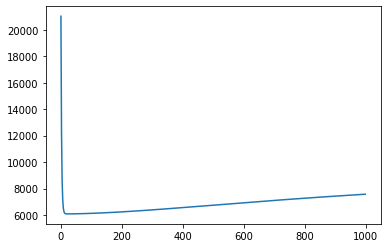

In [7]:
#8 하이퍼 파라미터인 학습률 설정하기

#학습률, learning rate를 설정해주세요

LEARNING_RATE = 0.1

#9 모델 학습하기

EPOCH = 1000

losses = []

for i in range(EPOCH):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


6757.532905127032


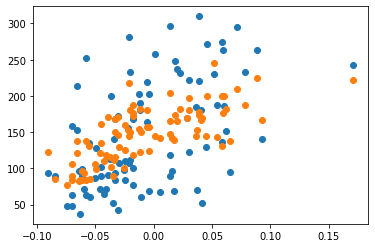

In [8]:
#10 test 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)# 절대적인 loss값은 커보이지만, 트레이닝때와 비슷한 loss값을 얻었다 


#11 정답 데이터와 예측한 데이터 시각화 하기

# x축에는 X데이터의 첫번째컬럼, y축에는 정답인 target 데이터를 넣어서 모델이
# 예측한 데이터를 시각화해 주세요
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()